In [12]:
import pandas as pd
cities = ['Tallinn', 'Helsinki', 'Delhi', 'Dhaka']
signups = [8, 12, 16,2]
visitors = [121, 145, 158, 888]
list_labels = ['city', 'signups', 'visitors']
list_col =[cities, signups, visitors]
zipped = list(zip(list_labels, list_col))
dictionary = dict(zipped)
dictionary

{'city': ['Tallinn', 'Helsinki', 'Delhi', 'Dhaka'],
 'signups': [8, 12, 16, 2],
 'visitors': [121, 145, 158, 888]}

Zip lists to build a DataFrame

list_keys contains the column names 'Country' and 'Total'. list_values contains the full names of each country and the number of gold medals awarded

To convert this zip object into a list, you'll need to use list()

In [13]:
list_keys = ['Country', 'Total']
list_values = [['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]

# Zip the 2 lists together into one list of (key,value) tuples: zipped
zipped = list(zip(list_keys, list_values))

# Inspect the list using print()
print(zipped)

# Build a dictionary with the zipped list: data
data = dict(zipped)

# Build and inspect a DataFrame from the dictionary: df
df = pd.DataFrame(data)
print(df)

[('Country', ['United States', 'Soviet Union', 'United Kingdom']), ('Total', [1118, 473, 273])]
          Country  Total
0   United States   1118
1    Soviet Union    473
2  United Kingdom    273


##### Createing the DataFrame

In [2]:
df = pd.DataFrame(dictionary)
print(df)

       city  signups  visitors
0   Tallinn        8       121
1  Helsinki       12       145
2     Delhi       16       158
3     Dhaka        2       888


##### Broadcasting
Recognised technique as a pandas and numpy arrays

In [14]:
df['fees']=0
#column fees is created on the fly and broadcasting
df

,city,signups,visitors,fees
0,Tallinn,8,121,0
1,Helsinki,12,145,0
2,Delhi,16,158,0
3,Dhaka,2,888,0


In [22]:
cities = ['Manheim',
 'Preston park',
 'Biglerville',
 'Indiana',
 'Curwensville',
 'Crown',
 'Harveys lake',
 'Mineral springs',
 'Cassville',
 'Hannastown',
 'Saltsburg',
 'Tunkhannock',
 'Pittsburgh',
 'Lemasters',
 'Great bend']
state = 'PA'
data = {'state': state, 'city': cities}
df = pd.DataFrame(data)
df.head()

,city,state
0,Manheim,PA
1,Preston park,PA
2,Biglerville,PA
3,Indiana,PA
4,Curwensville,PA


In [19]:
heights = [59.25, 57.13, 61.12, 56.32, 60.23]
data = {'height':heights, 'sex': 'M'}
result = pd.DataFrame(data)
print(result)
#adding column names
result.columns = ['Heights', 'Sex']
result.index = ['A', 'B', 'C', 'D', 'E']
print(result)

   height sex
0   59.25   M
1   57.13   M
2   61.12   M
3   56.32   M
4   60.23   M
   Heights Sex
A    59.25   M
B    57.13   M
C    61.12   M
D    56.32   M
E    60.23   M


#### Import and Export Data

In [25]:
df1 = pd.read_csv('data/world_population.csv')
new_labels = ['year', 'population']

# Read in the file, specifying the header and names parameters: df2
df2 = pd.read_csv('data/world_population.csv', header=0, names=new_labels)

# Print both the DataFrames
print(df1)
print("====================")
print(df2)

   Year  Total Population
0  1960      3.034971e+09
1  1970      3.684823e+09
2  1980      4.436590e+09
3  1990      5.282716e+09
4  2000      6.115974e+09
5  2010      6.924283e+09
   year    population
0  1960  3.034971e+09
1  1970  3.684823e+09
2  1980  4.436590e+09
3  1990  5.282716e+09
4  2000  6.115974e+09
5  2010  6.924283e+09


#### NumPy and pandas working together

In [11]:
# Import numpy
import numpy as np

# Create array of DataFrame values: np_vals
np_vals = df.values

# Create new array of base 10 logarithm values: np_vals_log10
np_vals_log10 = np.log10(np_vals)

# Create array of new DataFrame by passing df to np.log10(): df_log10
df_log10 = np.log10(df)

# Print original and new data containers
[print(x, 'has type', type(eval(x))) for x in ['np_vals', 'np_vals_log10', 'df', 'df_log10']]

np_vals has type <class 'numpy.ndarray'>
np_vals_log10 has type <class 'numpy.ndarray'>
df has type <class 'pandas.core.frame.DataFrame'>
df_log10 has type <class 'pandas.core.frame.DataFrame'>


[None, None, None, None]

In [16]:
# Labeling your data
df = pd.DataFrame({
    "a": [1980, 1981, 1982],
    "b": [np.nan, 'Batmobile', 'Bullwhip'],
    "c": [pd.NaT, pd.Timestamp("1940-04-25"), pd.NaT],
     "d": [pd.NaT, pd.Timestamp("1940-04-25"), pd.NaT],
    
})
# Build a list of labels: list_labels
list_labels = list(['year', 'artist', 'song', 'chart weeks'])

# Assign the list of labels to the columns attribute: df.columns
df.columns = list_labels
df

,year,artist,song,chart weeks
0,1980,NaN,NaT,NaT
1,1981,Batmobile,1940-04-25,1940-04-25
2,1982,Bullwhip,NaT,NaT


Delimiters, headers, and extensions

Not all data files are clean and tidy. Pandas provides methods for reading those not-so-perfect data files that you encounter far too often.

In [31]:
file_messy = 'data/messy_stock_data.tsv'
# Read the raw file as-is: df1
df1 = pd.read_csv(file_messy)

# Print the output of df1.head()
print(df1.head())

# Read in the file with the correct parameters: df2
df2 = pd.read_csv(file_messy, delimiter=' ', header=3, comment='#')

# Print the output of df2.head()
print(df2.head())

# Save the cleaned up DataFrame to a CSV file without the index
df2.to_csv('file_clean.csv', index=False)

# Save the cleaned up DataFrame to an excel file without the index
df2.to_excel('file_clean.xlsx', index=False)
pd.read_csv('file_clean.csv')

                                                   The following stock data was collect on 2016-AUG-25 from an unknown source
These kind of ocmments are not very useful                                                  are they?                        
probably should just throw this line away too          but not the next since those are column labels                        
name Jan Feb Mar Apr May Jun Jul Aug Sep Oct No...                                                NaN                        
# So that line you just read has all the column...                                                NaN                        
IBM 156.08 160.01 159.81 165.22 172.25 167.15 1...                                                NaN                        
     name     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug  \
0     IBM  156.08  160.01  159.81  165.22  172.25  167.15  164.75  152.77   
1    MSFT   45.51   43.08   42.13   43.47   47.53   45.96   45.61   45.51   
2  GOOGLE  51

,name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,IBM,156.08,160.01,159.81,165.22,172.25,167.15,164.75,152.77,145.36,146.11,137.21,137.96
1,MSFT,45.51,43.08,42.13,43.47,47.53,45.96,45.61,45.51,43.56,48.70,53.88,55.40
2,GOOGLE,512.42,537.99,559.72,540.50,535.24,532.92,590.09,636.84,617.93,663.59,735.39,755.35
3,APPLE,110.64,125.43,125.97,127.29,128.76,127.81,125.34,113.39,112.80,113.36,118.16,111.73


In [67]:
df = pd.read_csv('data/weather_data_austin_2010.csv')
df.head()
import matplotlib.pyplot as plt
df.head()

df3 = pd.read_csv('data/weather_data_austin_2010.csv', index_col='Date', parse_dates=True)
time_format = '%Y-%m-%d %H:%M'
df4 = pd.to_datetime(df3.index, format=time_format)
type(df4)

pandas.core.indexes.datetimes.DatetimeIndex

In [47]:
temperature_list = df['Temperature']
temperature_list.head()

0    46.2
1    44.6
2    44.1
3    43.8
4    43.5
Name: Temperature, dtype: float64

In [51]:
date_list = df['Date']
temperature_list = df['Temperature']
time_format = '%Y-%m-%d %H:%M'

# Convert date_list into a datetime object: my_datetimes
my_datetimes = pd.to_datetime(date_list, format=time_format)  

# Construct a pandas Series using temperature_list and my_datetimes: time_series
time_series = pd.Series(df['Temperature'], index=my_datetimes)

time_series

Date
2010-01-01 00:00:00   NaN
2010-01-01 01:00:00   NaN
2010-01-01 02:00:00   NaN
2010-01-01 03:00:00   NaN
2010-01-01 04:00:00   NaN
2010-01-01 05:00:00   NaN
2010-01-01 06:00:00   NaN
2010-01-01 07:00:00   NaN
2010-01-01 08:00:00   NaN
2010-01-01 09:00:00   NaN
2010-01-01 10:00:00   NaN
2010-01-01 11:00:00   NaN
2010-01-01 12:00:00   NaN
2010-01-01 13:00:00   NaN
2010-01-01 14:00:00   NaN
2010-01-01 15:00:00   NaN
2010-01-01 16:00:00   NaN
2010-01-01 17:00:00   NaN
2010-01-01 18:00:00   NaN
2010-01-01 19:00:00   NaN
2010-01-01 20:00:00   NaN
2010-01-01 21:00:00   NaN
2010-01-01 22:00:00   NaN
2010-01-01 23:00:00   NaN
2010-01-02 00:00:00   NaN
2010-01-02 01:00:00   NaN
2010-01-02 02:00:00   NaN
2010-01-02 03:00:00   NaN
2010-01-02 04:00:00   NaN
2010-01-02 05:00:00   NaN
                       ..
2010-12-30 18:00:00   NaN
2010-12-30 19:00:00   NaN
2010-12-30 20:00:00   NaN
2010-12-30 21:00:00   NaN
2010-12-30 22:00:00   NaN
2010-12-30 23:00:00   NaN
2010-12-31 00:00:00   NaN
2010-12

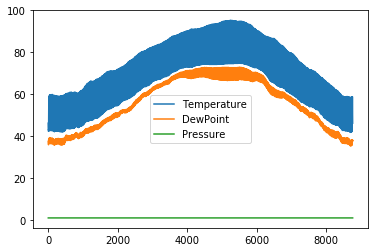

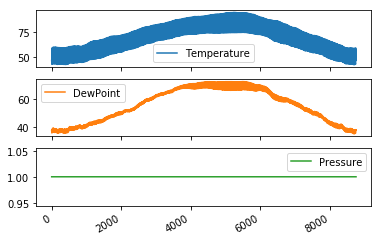

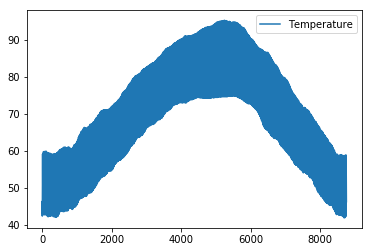

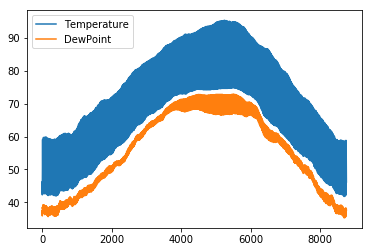

In [38]:
# Plot all columns (default)
df.plot()
plt.show()

# Plot all columns as subplots
df.plot(subplots=True)
plt.show()

# Plot just the Dew Point data
column_list1 = ['Temperature']
df[column_list1].plot()
plt.show()

# Plot the Dew Point and Temperature data, but not the Pressure data
column_list2 = ['Temperature','DewPoint']
df[column_list2].plot()
plt.show()

Visual exploratory data analysis
